# TP 8 : Récursion et programmation dynamique

## 8.1 Récursion (exercice de programmation de L1)

On considère la suite définie par récurrence:
$$\left\{\begin{array}{l}u(0)=2\\u(n)=\frac{u(n-1)}{2}+3\end{array}\right.$$

1. Programmez la suite de manière récursive:

In [25]:
def u(n): 
    if n == 0:
        return 2
    else :
        return (u(n-1)/2)+ 3

[u(i) for i in range(10)]

[2, 4.0, 5.0, 5.5, 5.75, 5.875, 5.9375, 5.96875, 5.984375, 5.9921875]

2. Programmez la suite de manière itérative:

In [26]:
def u1(n): 
    acc = 2
    for i in range(n):
        acc = (acc/2) + 3
    return acc

[u1(i) for i in range(10)]

[2, 4.0, 5.0, 5.5, 5.75, 5.875, 5.9375, 5.96875, 5.984375, 5.9921875]

3. Calculez et affichez la liste des 10 premières valeurs de $(u_n)$. Quel est le coût du calcul des termes de la suite en fonction de $n$?

In [27]:
import timeit

from functools import partial
testTimer = timeit.Timer(partial(u,n))
print(testTimer.timeit(10))

testTimer = timeit.Timer(partial(u1,n))
print(testTimer.timeit(10))

5.374000465963036e-06
6.258998837438412e-06


4. Reprogrammez cette fonction en utilisant la technique de memoisation (programmation dynamique)

In [28]:
def uM(n):
    memo = {0:2}
    def inter(n):
        if n not in memo:
            memo[n] = (inter(n-1))/2+3
        return memo[n]
    return inter(n)

[uM(i) for i in range(10)]

[2, 4.0, 5.0, 5.5, 5.75, 5.875, 5.9375, 5.96875, 5.984375, 5.9921875]

5. Reprogrammez cette fonction par la technique des générateurs

In [29]:
def genf():
    n=2
    while True :
        yield n
        n= n/2 + 3
fbis=genf()
for i in range(10):
    print(next(fbis),end=' ')

2 4.0 5.0 5.5 5.75 5.875 5.9375 5.96875 5.984375 5.9921875 

6. Comparez la complexité de ces différentes méthodes en traçant les courbes de complexité

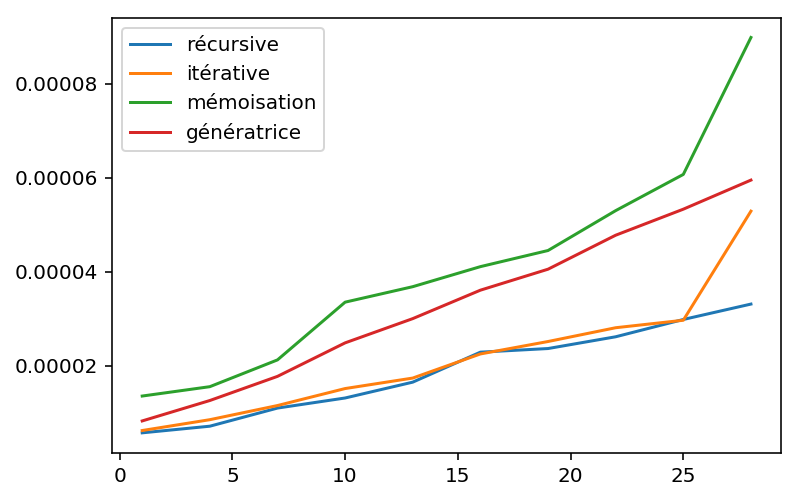

In [30]:
import matplotlib.pyplot as plt
x, q = [], []
for n in range(1,30,3):
    testTimer = timeit.Timer(partial(u,n))
    t = testTimer.timeit(number = 10)
    x.append(n)
    q.append(t)
plt.plot(x,q,marker='',label="récursive")

x, w = [], []
for n in range(1,30,3):
    testTimer = timeit.Timer(partial(u,n))
    t = testTimer.timeit(number = 10)
    x.append(n)
    w.append(t)
plt.plot(x,w,marker='',label="itérative")

x, y = [], []
for n in range(1,30,3):
    testTimer = timeit.Timer(partial(uM,n))
    t = testTimer.timeit(number = 10)
    x.append(n)
    y.append(t)

plt.plot(x,y,marker='',label="mémoisation")

x, z = [], []
for n in range(1,30,3):
    testTimer = timeit.Timer(partial(uM,n))
    t = testTimer.timeit(number = 10)
    x.append(n)
    z.append(t)

plt.plot(x,z,marker='',label="génératrice")
plt.legend()
plt.show()

## 8.2 Calcul des coefficients binomiaux

On rappelle que $C_n^p=C_{n-1}^p+C_{n-1}^{p-1}$. On souhaite calculer la fonction `binomial(n,p)` qui calcule $C_n^p$. Les cas particuliers sont $C_n^0=C_n^n=1$ (et $C_1^1=1$)

1. Programmez `binomial(n,p)` de façon récursive:

In [31]:
def binomial(n,p):
    if p == 0 :
        return 1
    elif p == n :
        return 1
    elif p == 1 and n == 1 :
        return 1
    else :
        return binomial(n-1, p) + binomial(n-1, p-1)

binomial(4,2)

6

2. Programmez `binomial(n,p)` en utilisant la programmation dynamique:

In [32]:
def binomialM(n,p):
    memo = {0:2}
    def inter(n,p):
        if n not in memo and p not in memo:
            if p == 0 :
                return 1
            elif p == n :
                return 1
            elif p == 1 and n == 1 :
                return 1
            else :
                return binomial(n-1, p) + binomial(n-1, p-1)
        return memo[n,p]
    return inter(n,p)

binomialM(1,1)

1

3. Programmez `binomial(n,p)` en utilisant la formule la factorielle `factorial` de `Sympy` $$C_n^p=\frac{n!}{p!(n-p)!}$$

In [33]:

from sympy import factorial
def binomialF(n,p):
    return factorial(n)/factorial(p)*(factorial(n-p))

binomialF(1,1)

1

4. Pensez-vous pouvoir calculer `binomial(n,p)` au moyen de generateurs?

> On génère un nombre binomial retourné par yield et on instancie l'objet dans bbis puis on fait un next(bbis) pour sortir la valeur.

In [34]:
from sympy import factorial
def genb(n,p):
    while True :
        yield factorial(n)/factorial(p)*(factorial(n-p))
bbis=genb(1,1)
print(next(bbis))

1


5. [facultatif] Comparez les complexités obtenues (attention, il y a deux paramètres !)

In [45]:
import timeit
from functools import partial
x, q = [], []

for n in range(1, 30, 3):
    for p in range(1,30,3):
        testTimer = timeit.Timer(partial(binomial,n,p))
        t = testTimer.timeit(10)

RecursionError: maximum recursion depth exceeded in comparison

>Afin d'éviter un stack overflow ("débordement de la pile"), Python admet 1000 comme limite de récursions par défaut, de fait une erreur est retournée...    
Peut-être que de reprogramer cet algorithme itérativement permettrait d'outrepasser cette limitte et obtenir un résultat.


## 8.3 Calcul de l'exponentielle modulaire

Reprenez `exponentMod` , la fonction de calcul de l'exponentielle modulaire du TP3, et comparez sa complexité avec  chacune des deux définition récursives suivantes de l'exponentielle modulaire (puis sa version programmation dynamique si nécessaire) (on comparera les complexités de 3^b mod 7 pour des valeurs de b croissantes):
$$a^b\mod n=(a*(a^{b-1}\mod n))\mod n$$
et
$$\left\{\begin{array}{ll}
a^b\mod n=(a^{b/2}\mod n)^2\mod n&\mbox{si $b$ pair}\\
a^b\mod n=(a^{\lfloor b/2\rfloor}\mod n)^2.(a\mod n)\mod n&\mbox{si $b$ impair}
\end{array}\right.$$

In [36]:
import timeit
from functools import partial
import matplotlib.pyplot as plt

In [37]:
def exponentMod(a,b,p):
    res=1
    for i in bin(b)[2:]:
        res=(res*res)%p
        if i=='1':
            res=(res*a)%p
    return(res)
    
def expoRec1(a,b,n):
    if b == 0:
        return 1
    return  (a * (expoRec1(a,b-1,n))) % n
    
def expoRec2(a,b,n):
    if b ==0:
        return 1
    if b%2==0:
        return expoRec2(a,int(b/2),n)**2 % n 
    if b%2!=0:
        return (expoRec2(a,int(b/2),n)**2 * (a % n)) % n

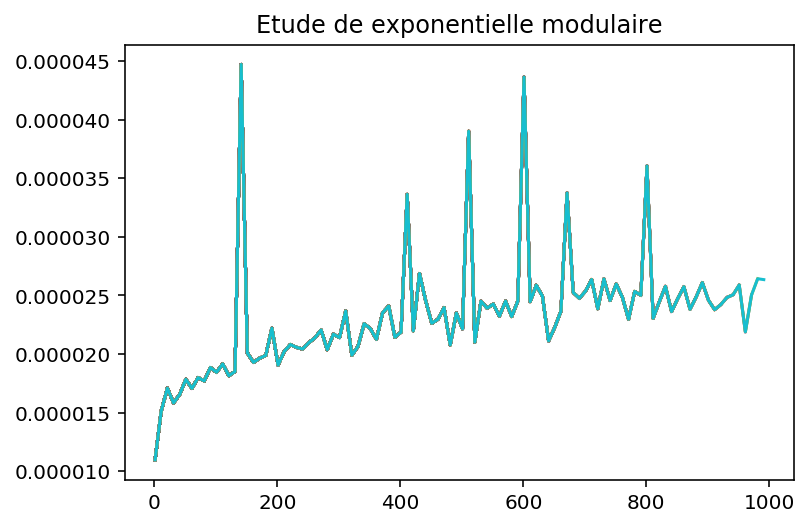

In [38]:
def graphexmo():
    q, j = [], []
    for b in range(1,1000,10):
        t =timeit.Timer(partial(exponentMod,2,b,7))
        t =t.timeit(20)
        q.append(b)
        j.append(t) 
        plt.plot(q,j)
        plt.title('Etude de exponentielle modulaire')
        
graphexmo()

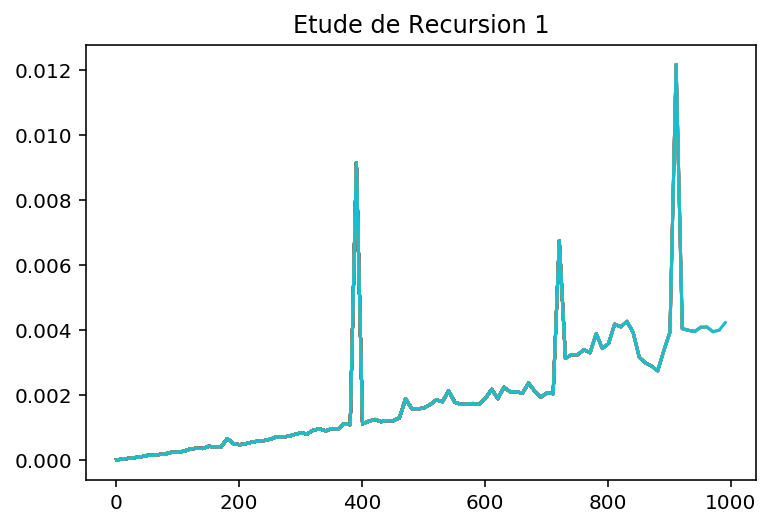

In [39]:
def graphRec1():
    q, j = [], []
    for b in range(1,1000,10):
        t =timeit.Timer(partial(expoRec1,3,b,7))
        t =t.timeit(20)
        q.append(b)
        j.append(t) 
        plt.plot(q,j)
        plt.title('Etude de Recursion 1')
        
graphRec1()

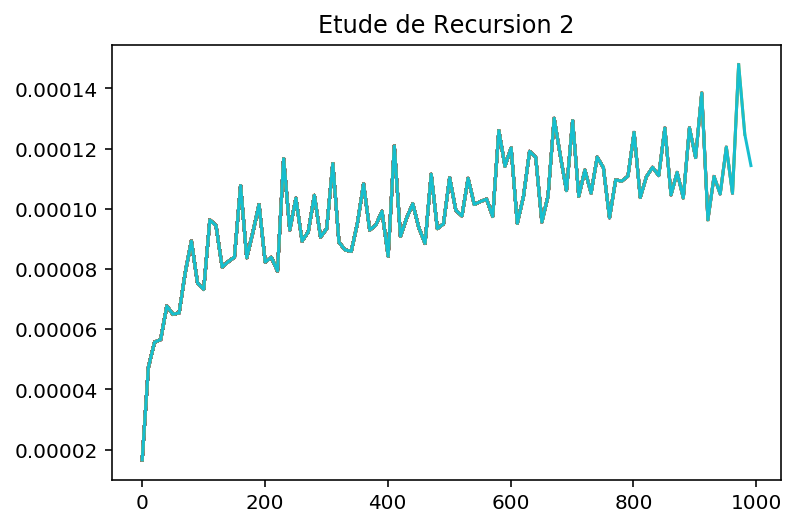

In [40]:
def graphRec2():
    q, j = [], []
    for b in range(1,1000,10):
        t =timeit.Timer(partial(expoRec2,3,b,7))
        t =t.timeit(20)
        q.append(b)
        j.append(t) 
        plt.plot(q,j)
        plt.title('Etude de Recursion 2')

graphRec2()

In [41]:
sommemoy = 0
for b in range(1,1000,10):
    t =timeit.Timer(partial(exponentMod,3,b,7))
    t =t.timeit(100)
    sommemoy += t
print("moyenne d'exponentMod()  : ",sommemoy/20)

sommemoy = 0
for b in range(1,1000,10):
    t =timeit.Timer(partial(expoRec1,3,b,7))
    t =t.timeit(100)
    sommemoy += t
print("moyenne d'exponentRec1() : ",sommemoy/20)

sommemoy = 0
for b in range(1,1000,10):
    t =timeit.Timer(partial(expoRec2,3,b,7))
    t =t.timeit(100)
    sommemoy += t
print("moyenne d'exponentRec2() : ",sommemoy/20)

moyenne d'exponentMod()  :  0.0005782288499176502
moyenne d'exponentRec1() :  0.04608978440064675
moyenne d'exponentRec2() :  0.002654310249727132
